<a href="https://colab.research.google.com/github/Arnobzzz/Data-Analysis-Projects/blob/main/Amazon_Data_Preparation_prediction_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk

In [5]:
##reading dataset
df = pd.read_csv('/content/Reviews.csv')

print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Assigning different different labels to helpful% according to its value

In [9]:
# Calculate the helpfulness percentage and handle division by zero
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], 0)

In [10]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

,Helpful %
0,80-100%
1,Empty
2,80-100%
3,80-100%
4,Empty
...,...
568449,Empty
568450,Empty
568451,80-100%
568452,80-100%


In [12]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [13]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty     20326      20326   20326        20324                 20326   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty     14838      14838   14838        14837                 14838   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty     23485      23485   23485        23485                 23485   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty     46796      46796   46796        46795                 46796   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty    198381     198381  198381       198364                198381   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10311                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                     20326   20326    20326   20326      20326  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                     14838   14838    14838   14838      14838  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                     23485   23485    23484   23485      23485  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

Considering only Id Column, as I have to count Total Upvotes for different different categories

In [14]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty     20326
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty     14838
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty     23485
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty     46796
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty    198381
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [15]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,20326
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,14838
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


Creating Pivot Table for better conclusion

In [16]:
df_s.pivot(index='%upvote',columns='Score')

Id                             
Score        1      2      3      4       5
%upvote                                    
Empty    20326  14838  23485  46796  198381
0-20%     2338    762    474    116     432
20-40%    4649   1618   1506    909    2275
40-60%    6586   3051   3384   3185   10312
60-80%    5838   2486   2754   2941   11060
80-100%  12531   7014  11037  26707  140661

Creating heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

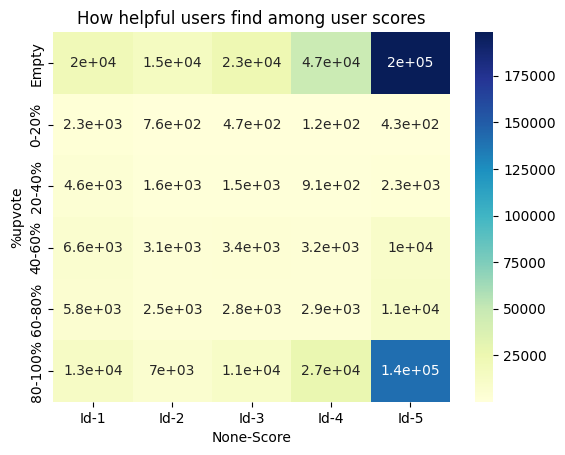

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

In [18]:
df.shape

(568454, 12)

In [19]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,Empty


In [20]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [21]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

Scoring prediction

# **Converting text into vectors using NLP**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [23]:
X_c = c.fit_transform(X)

In [24]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [26]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [27]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.937133902353675


Fetching Top 20 Positive & Top 20 negative words

In [30]:
w = c.get_feature_names_out()
w

array(['00', '000', '0000', ..., 'être', 'île', 'ît'], dtype=object)

In [31]:
coef = ml.coef_.tolist()[0]
coef

[-0.2874006351531897,
 0.2254868679803999,
 0.45612073323002494,
 -0.010170195918833771,
 -0.00906047501906091,
 -0.011287897689169168,
 0.00042565071017897364,
 -0.01537318626300659,
 0.0004598121654104583,
 0.0003419449553715693,
 0.001995588345661067,
 -0.00988819853335265,
 0.0,
 0.013692227128414745,
 -0.34725966209239023,
 0.0026572748793690718,
 0.0010766766104900345,
 0.00380063056105004,
 0.0,
 6.429643575127264e-05,
 -0.0067251997663329505,
 0.025383254526566774,
 0.027596405286811267,
 0.027596405286811267,
 0.027596405286811267,
 0.027596405286811267,
 0.027596405286811267,
 0.027596405286811267,
 0.027596405286811267,
 0.027596405286811267,
 0.027596405286811267,
 -0.0004438915030100045,
 0.0450383026489752,
 0.0,
 -0.09771264150368343,
 -0.0005589510774735298,
 0.0,
 0.003838172721817842,
 0.06520662364373873,
 2.6251551355314455e-05,
 -0.10671996634765898,
 0.012129368529659712,
 7.130524435974795e-05,
 0.005333231634735517,
 -0.0791116918077184,
 0.0,
 0.011187853816371

In [32]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.287401
1,000,0.225487
2,0000,0.456121
3,000001,-0.010170
4,00001,-0.009060
...,...,...
114964,çaykur,0.000706
114965,çelem,0.000000
114966,être,0.018611
114967,île,0.000000


In [33]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,4.320545
39072,downside,3.521341
94667,skeptical,3.321523
5865,addicting,2.891224
102857,terrific,2.522290
...,...,...
106852,unacceptable,-3.064630
113164,worst,-3.197134
67898,mediocre,-3.227743
34989,deceptive,-3.365097


In [34]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
      Word  Coefficient
pleasantly     4.320545
  downside     3.521341
 skeptical     3.321523
 addicting     2.891224
  terrific     2.522290
    hooked     2.450584
  drawback     2.447431
    resist     2.294053
economical     2.239611
   easiest     2.237387
 delighted     2.232487
    delish     2.224685
   worried     2.210347
      whim     2.160471
   welcome     2.155615
   trainer     2.140984
  soothing     2.087544
   awesome     2.065725
  minerals     2.060209
      calm     2.013301


-Top 20 negative-
          Word  Coefficient
      terrible    -2.319963
        bummer    -2.329364
         blech    -2.396886
    overpowers    -2.439104
        ruined    -2.442497
        lacked    -2.452098
    returnable    -2.523427
       vomited    -2.547440
         lousy    -2.624429
   disapointed    -2.630158
disappointment    -2.643110
   embarrassed    -2.830137
        ripoff    -2.949547
 disappointing    -3.008753
     cancelled    -3.021746
  unaccept

Lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy

In [38]:
def text_fit(X, y, nlp_model,ml_model,coef_show=1):

    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))

    if coef_show == 1:
        w = nlp_model.get_feature_names_out()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')
        print(coeff_df.tail(20).to_string(index=False))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [40]:
text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9365025027766367


-Top 20 positive-
      Word  Coefficient
pleasantly     3.544001
  downside     3.086943
 addicting     2.840912
    hooked     2.590674
 skeptical     2.546499
  terrific     2.291058
  drawback     2.247309
   worries     2.207990
  soothing     2.195521
    delish     2.132330
    resist     2.101722
      whim     2.097671
   trainer     2.041936
   welcome     2.011827
 excellent     1.941791
   easiest     1.929336
 delighted     1.898980
   awesome     1.898960
    intend     1.898227
 delicious     1.890740


-Top 20 negative-
          Word  Coefficient
         blech    -2.227596
         lousy    -2.227774
        bummer    -2.252309
   unappealing    -2.257370
       defeats    -2.285280
        lacked    -2.347688
      canceled    -2.348864
disappointment    -2.459450
   embarrassed    -2.471831
    unbearable    -2.478024
   disapointed    -2.498538
     cancelled    -2.51

Lets define a predict function

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):

    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [43]:
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 14915   2797]
 [  5496 108246]]
0.9369132928629026


Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.

In [44]:
from sklearn.dummy import DummyClassifier

In [45]:
text_fit(X, y, c, DummyClassifier(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.8435117988041444


Logistic regression model on TFIDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.93377911664917


-Top 20 positive-
      Word  Coefficient
     great    14.540706
      best    12.108258
 delicious    11.664285
   perfect    10.579630
 excellent     9.574902
     loves     9.306191
    highly     8.970212
   amazing     8.871609
   awesome     8.591064
      love     8.251784
 wonderful     7.828476
    hooked     7.648617
     yummy     7.612238
      good     7.548813
 fantastic     7.531980
   pleased     7.452785
  favorite     7.002952
pleasantly     6.940782
      nice     6.864293
      glad     6.852778


-Top 20 negative-
          Word  Coefficient
         stale    -6.066295
           rip    -6.100296
         bland    -6.106088
   undrinkable    -6.110362
         hopes    -6.214758
         worse    -6.653221
        return    -6.677154
          weak    -6.842206
    disgusting    -6.979862
          yuck    -7.006427
     tasteless    -7.038241
 unfortunately    -7.1262

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14074   2355]
 [  6442 108583]]
0.933079252057754


# **Upvote prediction**



We will be focusing on score 5 reviews, and get rid of comments with neutral votes



In [48]:
data = df[df['Score'] == 5]

In [49]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [50]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [51]:
X = data2['Text']

In [52]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [53]:
print(y.value_counts())

%upvote
1.0    151721
0.0      2707
Name: count, dtype: int64



The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tf=TfidfVectorizer()

In [56]:
X_c=tf.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [58]:
y_test.value_counts()

,count
%upvote,
1.0,45509
0.0,820


In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
os =  RandomOverSampler()

In [62]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [64]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [65]:
from collections import Counter

In [66]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_class=LogisticRegression()

In [69]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [70]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [71]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [72]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  820     0]
 [  829 44680]]
0.9821062401519567
